In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import functions as fn

In [10]:
sqlQuery = '''
SELECT 
goalDate,
count(DISTINCT gameID) as games,
count(*) as goals,
(cast(count(goalDate) as float) / CAST (count(DISTINCT gameID) as float)) as goalsPerGame
from nhl.dbo.goals g
GROUP BY goalDate 
ORDER by goalDate'''
gdf = pd.read_sql_query(sqlQuery, fn.dbConnection())

In [12]:
gdf = gdf.rename(columns={'goaldate':'goalDate', 'goalspergame':'goalsPerGame'})
gdf['goalDate'] = pd.to_datetime(gdf['goalDate'], format='%Y-%m-%d')
gdf = gdf.set_index('goalDate')

In [13]:

x = gdf[['games']]
y = gdf[['goals']]
a, b = np.polyfit(gdf['games'], gdf['goals'], 1)

regressor = LinearRegression()
regressor.fit(x,y)
y_pred = regressor.predict(x)

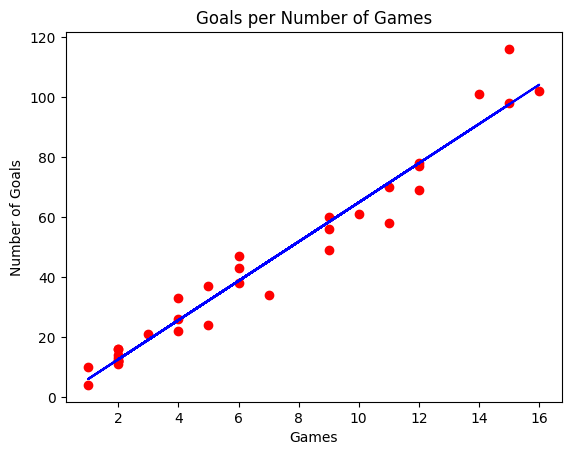

In [14]:
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Goals per Number of Games')
plt.xlabel('Games')
plt.ylabel('Number of Goals')
plt.show()

In [15]:
print(f'Regression Score of {regressor.score(x,y)}')
print(f'Regression coefficient of  {regressor.coef_[0][0]}')
print(f'Regression crosses y at  {regressor.intercept_[0]}')

Regression Score of 0.9618277167052859
Regression coefficient of  6.538229740045801
Regression crosses y at  -0.561814456185445
